<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

# CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

# Import libraries

In [ ]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [1]:
# insert code here
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets

# import keras
# conda install -c conda-forge keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical


from keras.datasets import cifar10

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from keras.layers import MaxPool2D

In [3]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

# Load data
Use the **Keras**' load method.

In [11]:
# insert code here
#dataset=cifar10.load_data()
(X_train, t_train), (X_test, t_test) = cifar10.load_data()

In [12]:
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert t_train.shape == (50000, 1)
assert t_test.shape == (10000, 1)

## Check some data

In [80]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


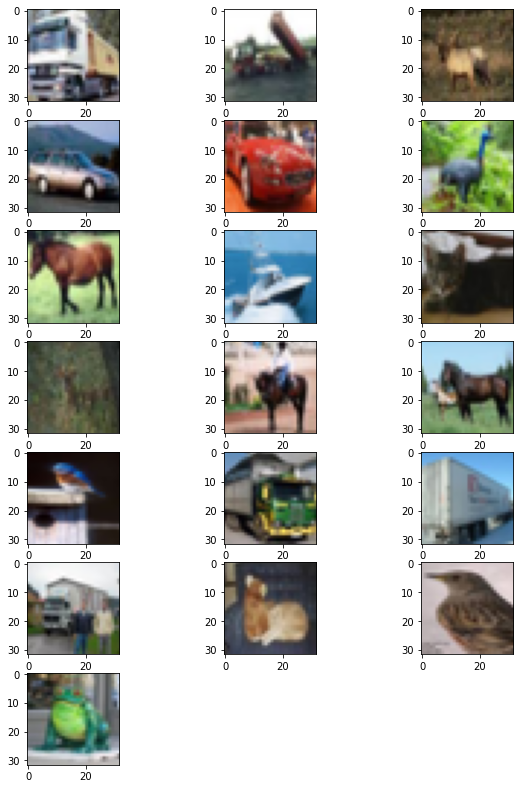

In [13]:
# insert code here

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, t_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, t_test.shape))
# plot first few images
plt.figure(figsize = (10, 20))
for i in range(1,20):
    # define subplot
    plt.subplot(10,3,i)
    # plot raw pixel data
    plt.imshow(X_train[i])
# show the figure
plt.show()

## Prepare data

In [14]:
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [ ]:
# insert code here

# Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [65]:
%%time
# insert code here

model = Sequential()

Wall time: 1.99 ms


In [62]:
#import tensorflow as tf

In [64]:
#tf.keras.backend.clear_session()

In [66]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [67]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 48)        1344      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 48)        0         
                                                                 
 flatten (Flatten)           (None, 10800)             0         
                                                                 
 dropout_1 (Dropout)         (None, 10800)             0         
                                                        

In [68]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

## Compile the model

In [69]:
X_test.shape

(10000, 32, 32, 3)

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
# insert code here


fitted_model = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=0)

# Fit the training data

In [72]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [ ]:
%%time
# insert code here

# ..., callbacks = [tensorboard], ...

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [73]:
%load_ext tensorboard
%tensorboard --logdir logs

# Create predictions

In [74]:
%%time
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis= 1)
predictions

Wall time: 2.67 s


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

# Evaluate the model

In [75]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.4f, Test accuracy: %.4f' % tuple(score))

1000/1000 [==============================] - 4s 4ms/step - loss: 2.3179 - accuracy: 0.1011

Test loss: 2.3179, Test accuracy: 0.1011


# Visualisation of cost

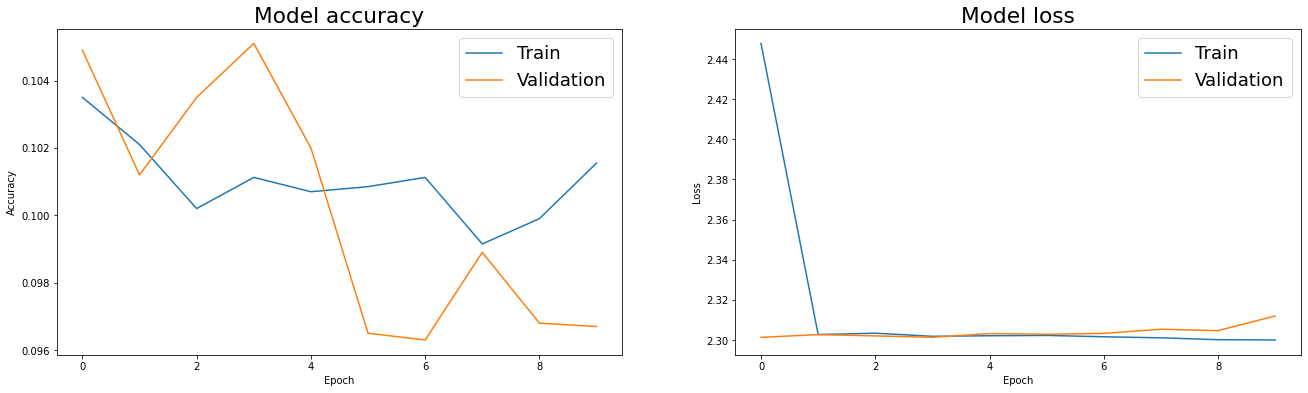

In [76]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(fitted_model.history['accuracy'])
ax[0].plot(fitted_model.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(fitted_model.history['loss'])
ax[1].plot(fitted_model.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

# Results

In [81]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

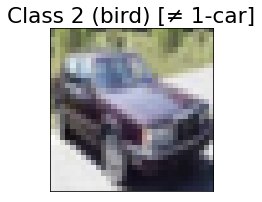

In [82]:
# insert code here
check_one(X_test, predictions, actual = y_test, compare = True)

In [83]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

# Save and Load models and weights

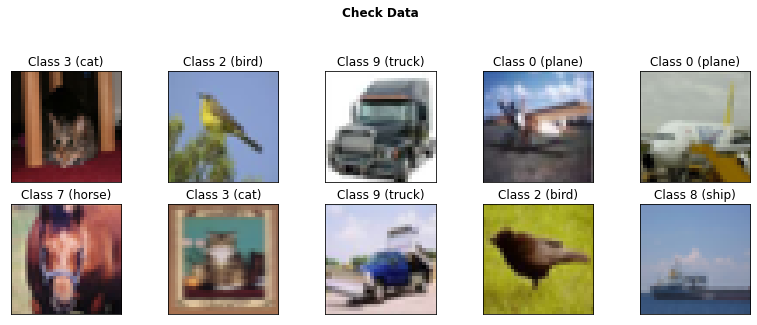

In [84]:
check_ten(X_train, t_train.flatten())

## Save

In [85]:
# insert code here

model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# save weights
model.save_weights('model.h5')

## Load

In [86]:
# insert code here
from keras.models import model_from_json

In [87]:
new_model = Sequential()

In [88]:
# load model
with open('model.json', 'r') as json_file:
    model_json = json_file.read()
new_model = model_from_json(model_json)

# load weights
new_model.load_weights('model.h5')

In [89]:
# compile the new model
new_model.compile(optimizer = 'adam', 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])

© 2020 Institute of Data